In [ ]:
def MLMCAmOpLevelL(l, N, NperLoop, T, r, sig, S0, K, exBoundType, exBoundParams):
# l given level --> M^l time steps between 0 and T
# N number of path samples
# NperLoop number of path samples done in one loop
# T final time
# r risk free interest rate
# sig vol parameter
# S0 starting underlying value
# K strike value
# exBoundType flag which denotes the parametrisation
# type of the exercise boundary
# exBoundParams parameters for the exercise boundary
    
    nf = 2**l
    nc = 2**(l-1)
    
    hf = T/nf
    hc = T/nc
    
    tf = 0
    tc = 0
    sums(1:4) = 0
    
    # Loop until N paths have been computed in total
    for N1 in range(1, N+1, NperLoop):
        # at each step deal with N2 paths
        N2 = min(NperLoop, N-N1+1)
        
        # path variables X_t = log(S_t)
        Xf(:,1) = np.log(SO) * np.ones(N2, 1)
        
        # Probability of not having crossed yet
        Xf(:,2) = np.ones(N2,1)
        
        # Payoff part 1 --> barrier hit during some interval
        Xf(:,3) = np.zeros(N2,1)
        Xc = Xf
        tf = 0
        tc = 0
        
        if l == 0:
            for n in range(1,nf+1):
                hf = T/nf**2 * (2*(nf-n)+1)
                dWf = np.sqrt(hf)*np.random.randn(N2,1)
                
                Xleft = Xf(:,1)
                Xright = Xleft + (r-sig**2/2)*hf + sig*dWf
                
                leftBarrier = exerciseBoundary(tf, T, K, exBoundType, exBoundParams)
                tf = tf + hf
                tfMid = tf - hf/2
                rightBarrier = exercieseBoundary(tf, T, K exBoundType, exBoundParams)
                midBarrier = exerciseBoundary(tfMid,T,K,exBoundType,exBoundParams)
                
                if (leftBarrier != 0) and (rightBarrier != 0):
                    Prob1 = np.exp(-2 * max(Xleft - np.log(leftBarrier), 0) * max(Xright - np.log(rightBarrier),0) / hf / sig**2)
                    
                else:
                    Prob1 = np.exp(-2 * max(np.exp(Xleft)-leftBarrier, 0) * max(np.exp(Xright)-rightBarrier, 0) / hf / sig**2 / (np.exp(Xleft))**2)
                    
                # update payoff
                Xf[:,3] = Xf[:,3] + Xf[:,2]*Prob1 * max(K-midBarrier,0)*np.exp(-r*tfMid)
                
                # update crossing probability
                Xf = 
    
def MLMCAmOp(eps, MLMCAMOpLevelL, exBoundType, exBoundParams):
    T = 1
    r = 0.05
    sig = 0.2
    S0 = 0.8
    NperLoop = 10000
    K = 1.0
    
    L = -1
    N = 1000
    converged = 0
    
    while not converged:
        # Initial Variance Estimate
        
        L = L+1
        sums = MKMCAmOpLevelL(L, N, NperLoop, T, r, sig, S0, K, exBoundType, exBoundParams)
        sum1(1, L+1) = N
        sum1(2, L+1) = sums(1)
        sum1(3, L+1) = sums(2)
        
       # Optimal Sample Sizes
        
        V1 = sum1(3,:)/sum1(1,:) - (sum1(2,:)/sum1(1,:))**2
        N1 = ceil(2*np.sqrt(V1/(2**(0:L))) * sum(np.sqrt(V1*(2**(0:L)))) / eps**2)
        
        # Update Sample Sums
        for l in range(0:L+1):
            dNl = Nl(l+1)-suml(1,l+1)
            if dNl>0:
                sums = MLMCAmOpLevelL(l, dNl, NperLoop, T, r, sig, S0, K, exBoundType, exBoundParams)
                suml(1,l+1) = suml(1,l+1) + dNl
                suml(2,l+1) = suml(2,l+1) + sums(1)
                suml(3,l+1) = suml(3,l+1) + sums(2)
        
        # Test for Convergence
        ranges = np.linspace(-1,0,2)
        if L>1 and 2**L >= 16:
            con = 2**range * suml(2,L+1+range) / suml(1,L+1+range)
            converged = (max(abs(con)) < eps/sqrt(2))
            
        # Evaluate Multi-timestep Estimator
        P = sum(sum1(2, 1:L+1) / sum1(1, 1:L+1))
        N1 = sum1(1,:)
        


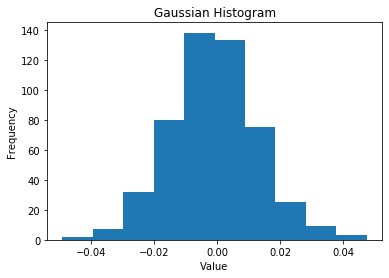

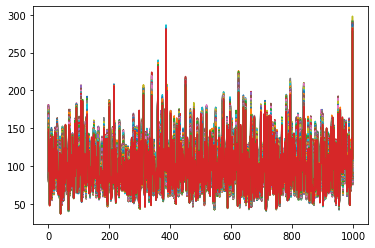

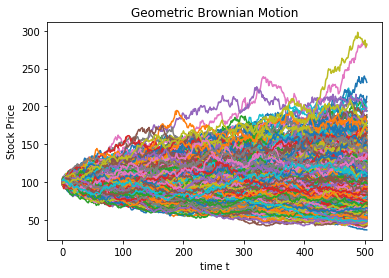

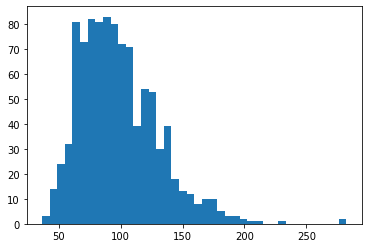

11.854460756153312


In [5]:
import math
import random
import pylab
from random import gauss
from math import exp, sqrt
import matplotlib
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

# Monte carlo simulation using brownian motion
# n is the number of simulations, 
# T is time to maturity,
# sigma is the volatility
# S0 is the initial stock price
# K is the strike price.

def monte_carlo_simulation(n,T,sigma,S0,K):
    dt=T*252
     # generate random numbers
    u = random.randn(dt) * sigma / sqrt(dt)
     #lets plot the histogram
    plt.hist(u)
    plt.title("Gaussian Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
     
    # creating a geometric random walk
    z= cumprod(1+random.randn(n,dt)*sigma/sqrt(dt),1)*S0
    plt.plot(z)
    plt.show()
    plt.title("Geometric Brownian Motion")
    plt.xlabel("time t")
    plt.ylabel("Stock Price")
 
    for i in z: plt.plot(i)
    plt.show()
    
    plt.hist(z[:,-1],40)
    plt.show()
 
    # to compute the payoff of the option
    payoffs = (z[:, -1] - 100) * ((z[:, -1] - 100) > 0)
#     print(payoffs)
    price = mean(payoffs)
    print(price)
    
monte_carlo_simulation(1000,2,0.3,100,105)